## Data Visulization and Exploration
####  Identify the factors that are correlated to Gift Amount
####  Identify the trends that are changing with time

In [3]:
#import python packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Import Data after processing
don =  pd.read_csv("data/donations.csv")

C:\Users\Wesley\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13,23,24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Remove observations that are from 2011
don = don[don['Fiscal Year'] != 2011]

In [6]:
# Check basic statistics for gift amount
don['Gift Amount'].describe()

count    3.799162e+06
mean     9.120257e+01
std      3.683310e+02
min      0.000000e+00
25%      2.500000e+01
50%      5.000000e+01
75%      1.000000e+02
max      1.491750e+05
Name: Gift Amount, dtype: float64

Here we can see that the average gift amount is $91.20.  This is an important value that can be used as a benchmark.  Also we can see that the distribution of gift amount is highly skewed by several large donations.

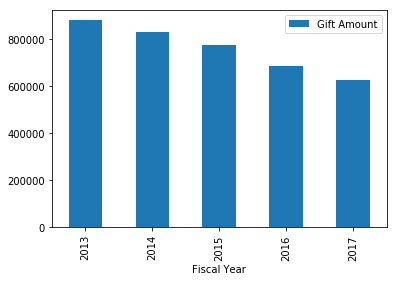

In [7]:
#Check the number of donations for each year
don[['Gift Amount', 'Fiscal Year']].groupby('Fiscal Year').count().plot(kind='Bar')

Number of dononations decreasing each year.

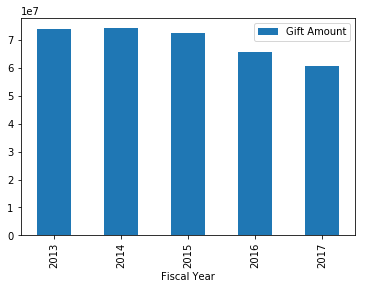

In [10]:
#Check the donation sum each year
don[['Gift Amount', 'Fiscal Year']].groupby('Fiscal Year').sum().plot(kind='Bar')

The last two years have seen significant revenue decrease.

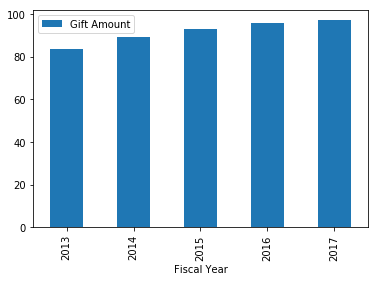

In [5]:
#Check how gift amount changes with time.
don[['Gift Amount', 'Fiscal Year']].groupby('Fiscal Year').mean().plot(kind='Bar')

Even though revenue is dropping, the average gift amount is steadily increasing.

In [7]:
#Check the average gift amount for each event.  This will show us how important individual events are.
don[['Gift Amount', 'Event ID']].groupby('Event ID').mean().sort_values(by='Gift Amount', ascending=False).head(20)

,Gift Amount
Event ID,
19339,2176.469167
25526,1240.625000
21417,364.000000
21414,267.713918
21419,262.306667
23838,238.565737
19337,221.091146
24857,217.913553
23840,205.941176


In [8]:
#Check revenue for each event.
don[['Gift Amount', 'Event ID']].groupby('Event ID').sum().sort_values(by='Gift Amount', ascending=False).head(20)

,Gift Amount
Event ID,
25298,17911313.47
22598,17495574.53
20226,15631285.67
27003,14022350.44
28263,12581788.39
22817,5652058.68
20331,5522478.29
25223,5211226.09
27061,4654624.04


The best events have significantly higher donation averages than the average.  Maintaning legacy events will be important in preserving profitablity in the future

In [9]:
#check average gift amount for each campain.
don[['Gift Amount', 'Campaign ID']].groupby('Campaign ID').mean().sort_values(by='Gift Amount', ascending=False).head(20)

,Gift Amount
Campaign ID,
37098,364.000000
37095,267.713918
37101,262.306667
39922,238.565737
39924,205.941176
44454,163.730167
42394,161.562650
39554,147.342318
45044,146.591900


In [10]:
#Check total gift amount for each campain.
don[['Gift Amount', 'Campaign ID']].groupby('Campaign ID').sum().sort_values(by='Gift Amount', ascending=False).head(20)

,Gift Amount
Campaign ID,
41373,17911313.47
38872,17495574.53
35352,15631260.67
44959,15040938.13
35555,14181202.82
44120,14022350.44
35571,10900677.52
41008,6700915.08
35564,5534493.33


In [11]:
#Gift type:
# 0: offline, 1: online
don[['Gift Amount', 'Gift Type']].groupby('Gift Type').mean()

,Gift Amount
Gift Type,
0,137.983370
1,79.140695


In [ ]:
Offline gifts have a significantly higher average that online gifts

C:\Users\Wesley\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


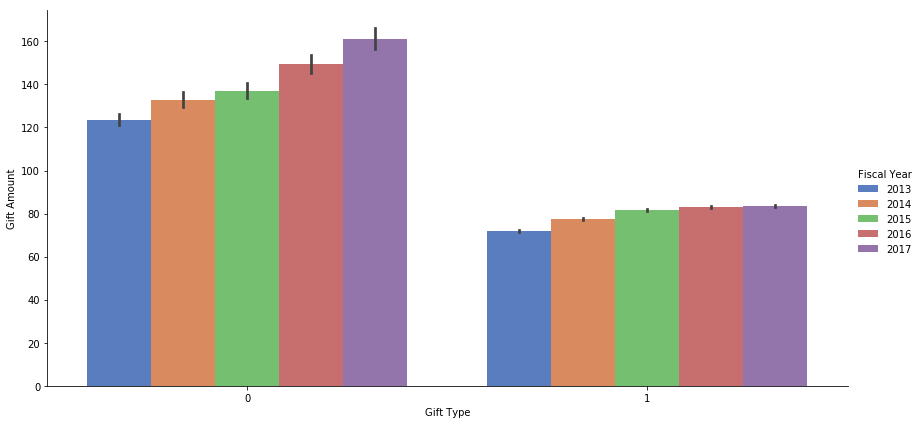

In [12]:
#Check how the average gift amount changes with time
sns.catplot('Gift Type', 'Gift Amount', 'Fiscal Year', data=don, kind='bar', 
               height=6, aspect=2, palette="muted")

Offline gifts are increasing while online gifts are flat.

In [13]:
#Gift payment method
# 1: Credit Card 2: Check 3: Cash
don[['Gift Amount', 'Gift Payment Method']].groupby('Gift Payment Method').mean()

,Gift Amount
Gift Payment Method,
1,79.579799
2,148.283362
3,67.636075


Checks have higher average gift amount then credit card or cash

In [14]:
don[['Gift Amount', 'Gift Payment Method']].groupby('Gift Payment Method').count()

,Gift Amount
Gift Payment Method,
1,3062718
2,656596
3,79848


The most frequent gift are credit card followed by check.

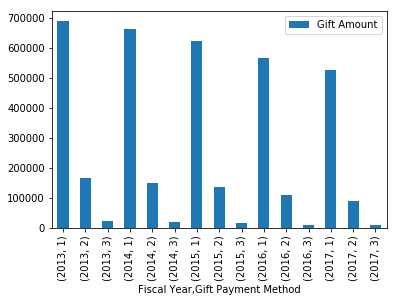

In [15]:
#Check revenue in each gift type.
don[['Gift Amount', 'Gift Payment Method', 'Fiscal Year']].groupby([ 'Fiscal Year', 'Gift Payment Method']).count().plot(kind='Bar')

Here is the revenue from each gift type.  We can see revenues dropping in each type.

In [16]:
#Soft credit type:
# 1: participant 2: team 3: event
don[['Gift Amount', 'Soft Credit Type']].groupby('Soft Credit Type').mean()

,Gift Amount
Soft Credit Type,
1,89.480385
2,208.151010
3,377.471124


Gifts donated on to events have the highest average, followed by team and participant.

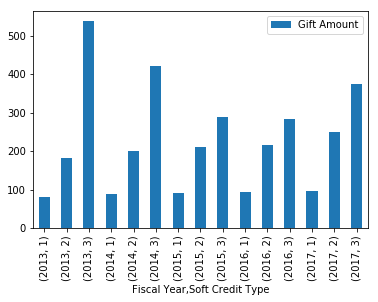

In [17]:
#Check average gift amount for each year.
don[['Gift Amount', 'Soft Credit Type', 'Fiscal Year']].groupby(['Fiscal Year', 'Soft Credit Type']).mean().plot(kind='Bar')

Participant gifts aver very steady, while event gifts change from year to year.  Team gifts are steadily increasing.

In [18]:
#Check average donor gender
# 0: male 1: female 2: Not Specified
don[don['Donor Gender'] != 2][['Donor Gender', 'Fiscal Year']].groupby('Fiscal Year').mean()

,Donor Gender
Fiscal Year,
2013,0.496769
2014,0.496956
2015,0.498030
2016,0.497093
2017,0.496001


Donor gender is consistant.

In [19]:
#Check average donor gift by gender for each year.
don[['Donor Gender', 'Gift Amount', 'Fiscal Year']].groupby([ 'Fiscal Year', 'Donor Gender']).mean()

Gift Amount
Fiscal Year Donor Gender             
2013        0               85.926577
            1               62.497971
            2              164.986957
2014        0               92.252708
            1               66.474701
            2              164.327831
2015        0               96.772295
            1               69.785847
            2              170.158338
2016        0               99.526233
            1               73.193545
            2              139.745955
2017        0               99.564437
            1               72.892667
            2              163.013932

Donations are consistently increasing for both male and female.

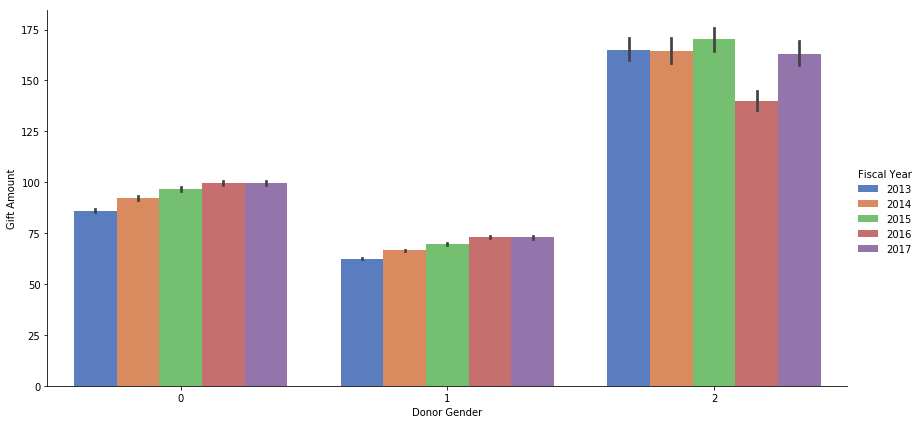

In [20]:
#Graph of average donation for each gender.
sns.catplot('Donor Gender', 'Gift Amount', 'Fiscal Year', data=don, kind='bar', 
               height=6, aspect=2, palette="muted")

In [21]:
#Check average donation for donors with and without email.
# 0: do not use email, 1: use email
don[['Gift Amount', 'Donor Accept Email']].groupby('Donor Accept Email').mean()

,Gift Amount
Donor Accept Email,
0,83.21014
1,99.28211


Donors who accept email give slightly more.

In [22]:
#Check average gift amount for each year.
don[['Donor Accept Email', 'Gift Amount', 'Fiscal Year']].groupby([ 'Fiscal Year', 'Donor Accept Email']).mean()

Gift Amount
Fiscal Year Donor Accept Email             
2013        0                     75.578686
            1                     96.470483
2014        0                     82.261350
            1                     96.948291
2015        0                     85.462068
            1                    101.257772
2016        0                     89.404463
            1                    100.252407
2017        0                     90.470405
            1                    101.281958

Difference is consistant for each year.

In [23]:
#Check connection to MS
# 0: associate has MS 1: no connection to MS
don[['Gift Amount', 'Donor Connection to MS']].groupby('Donor Connection to MS').mean()

,Gift Amount
Donor Connection to MS,
0.0,92.858605
1.0,88.457670


Maybe corporate gift (gender not specified) are skewing the donation for no connection to MS.

In [24]:
don[don['Donor Gender'] != 2][['Gift Amount', 'Donor Connection to MS']].groupby('Donor Connection to MS').mean()

,Gift Amount
Donor Connection to MS,
0.0,76.257475
1.0,88.758255


Even with gender specified, no connection still has a higher donation average.

In [25]:
#Check donations for first time participants
don[['Gift Amount', 'Is Prior Participant']].groupby('Is Prior Participant').mean()

,Gift Amount
Is Prior Participant,
0,77.995266
1,99.611274


Repeat riders have significantly higher donations on average.

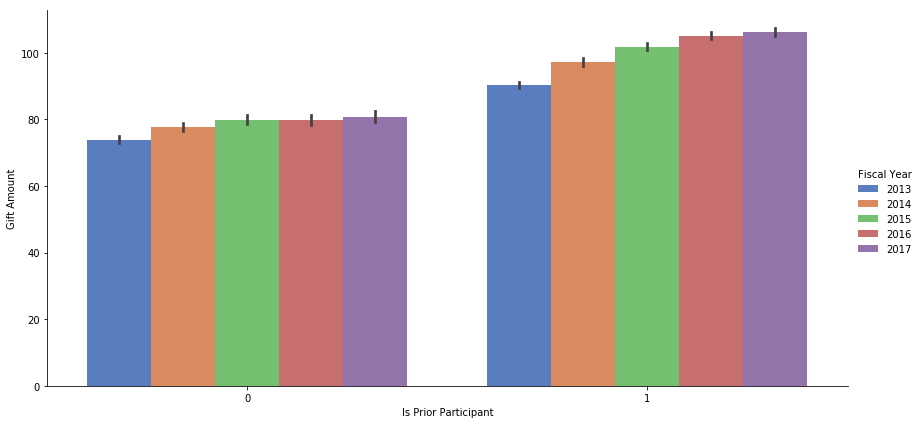

In [26]:
#Check trend over time
sns.catplot('Is Prior Participant', 'Gift Amount', 'Fiscal Year', data=don, kind='bar', 
               height=6, aspect=2, palette="muted")

Repeat riders average donations are consistantly increasing each year.

In [27]:
#Check average gift amount for team captians.
don[['Gift Amount', 'Is Team Captain']].groupby('Is Team Captain').mean()

,Gift Amount
Is Team Captain,
0,87.624495
1,115.130684


Team captians bring in higher average donations than regular participants.

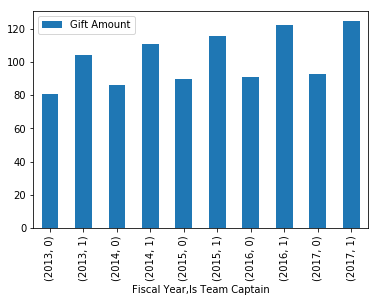

In [28]:
don[['Is Team Captain', 'Gift Amount', 'Fiscal Year']].groupby([ 'Fiscal Year', 'Is Team Captain']).mean().plot(kind='Bar')

Both groups average donations are steadily increasing.

In [29]:
#Create dummy column for riders who belong to a team.
don['Team Flag'] = don['Team']
don.loc[don['Team'] == 'None', 'Team Flag'] = 0
don.loc[don['Team'] != 'None', 'Team Flag'] = 1

In [30]:
don['Team Flag'].value_counts()

1    3294813
0     504349
Name: Team Flag, dtype: int64

Most donations are associated with a team (87%)

In [31]:
don[['Gift Amount', 'Team Flag']].groupby('Team Flag').mean()

,Gift Amount
Team Flag,
0,80.076518
1,92.905678


Team donations have a higher average.

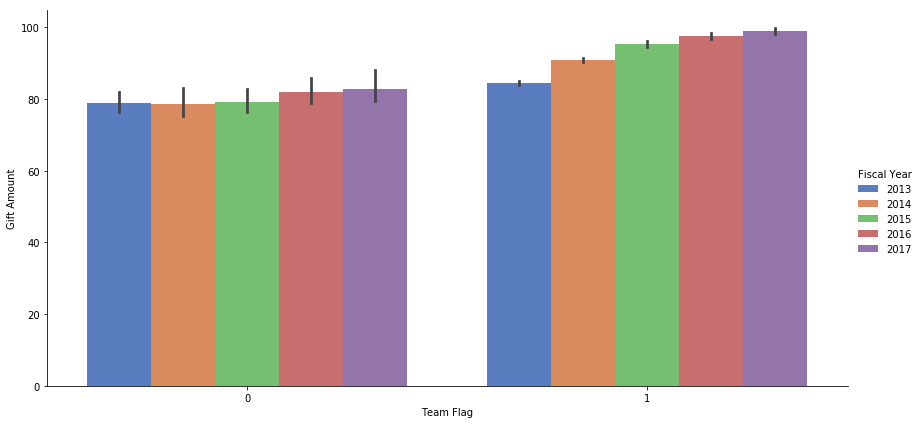

In [32]:
#Check how average donation changes with time.
sns.catplot('Team Flag', 'Gift Amount', 'Fiscal Year', data=don, kind='bar', 
               height=6, aspect=2, palette="muted")

Team donations are steadily increasing while non team donations are flat.

In [35]:
#Check correlations
don[['Fiscal Year', 'Gift Amount', 'Gift Type', 'Gift Payment Method', 'Soft Credit Type', 'Is Registration?', 'Donor Gender',
   'Donor Accept Email', 'Donor Email Status', 'Donor Connection to MS', 'Registration Active Status', 'Participant Goal',
   'Is Prior Participant', 'Is Team Captain', 'Team Flag']].corr()

,Fiscal Year,Gift Amount,Gift Type,Gift Payment Method,Soft Credit Type,Is Registration?,Donor Gender,Donor Accept Email,Donor Email Status,Donor Connection to MS,Registration Active Status,Participant Goal,Is Prior Participant,Is Team Captain,Team Flag
Fiscal Year,1.000000,0.012809,0.046760,-0.052416,-0.002148,0.000806,0.039470,0.148013,-0.016392,0.036585,0.010033,0.030444,0.030170,0.016794,0.020903
Gift Amount,0.012809,1.000000,-0.064492,0.052486,0.048097,-0.053641,0.029091,0.021817,-0.000699,-0.005788,-0.031281,0.107087,0.028611,0.025121,0.011818
Gift Type,0.046760,-0.064492,1.000000,-0.921766,-0.057719,0.074520,-0.286769,-0.176516,0.209325,0.209997,0.032801,-0.066698,-0.095751,-0.036797,0.058713
Gift Payment Method,-0.052416,0.052486,-0.921766,1.000000,0.056196,-0.065809,0.293056,0.145781,-0.222608,-0.197540,-0.033046,0.055087,0.089592,0.033382,-0.056337
Soft Credit Type,-0.002148,0.048097,-0.057719,0.056196,1.000000,-0.033368,0.039778,0.014699,-0.017604,-0.008757,-0.778986,-0.041758,-0.125953,-0.038863,-0.064545
Is Registration?,0.000806,-0.053641,0.074520,-0.065809,-0.033368,1.000000,-0.157360,0.127095,0.048337,0.160074,-0.047102,-0.093179,-0.067803,-0.055432,-0.069157
Donor Gender,0.039470,0.029091,-0.286769,0.293056,0.039778,-0.157360,1.000000,0.047530,-0.087322,-0.105213,-0.017683,-0.008080,-0.017226,0.006700,0.003994
Donor Accept Email,0.148013,0.021817,-0.176516,0.145781,0.014699,0.127095,0.047530,1.000000,0.181518,0.051703,-0.015148,-0.010263,-0.007517,0.003295,-0.030582
Donor Email Status,-0.016392,-0.000699,0.209325,-0.222608,-0.017604,0.048337,-0.087322,0.181518,1.000000,0.079755,0.004639,-0.029238,-0.028974,-0.014678,0.006626
Donor Connection to MS,0.036585,-0.005788,0.209997,-0.197540,-0.008757,0.160074,-0.105213,0.051703,0.079755,1.000000,-0.003912,-0.022466,0.024530,0.038148,-0.009247


Since most variables are categorical, correlations are not significant.